<a href="https://colab.research.google.com/github/SergeiVorobev/Cryptocurrency-Trading-Bots-Python-Beginner-Advance/blob/master/AnalysisOfBitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import operator as op
import numpy as np
from datetime import datetime
from numpy.random import rand
import operator as op
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# load the data  
from google.colab import files
uploaded = files.upload()

Saving Binance_BTCUSDT.csv to Binance_BTCUSDT.csv


In [ ]:
#Store the data
BitcoinPrice = pd.read_csv('Binance_BTCUSDT.csv', header = 1)
# # Add columns name
# BitcoinPrice.rename(columns={0: 'Date', 1: 'Price'}, inplace=True)
# BitcoinPrice.to_csv('BitcoinPrice.csv', index=False)
# Show the data
# BitcoinPrice.iloc[::-1]
#  BitcoinPrice.reset_index(inplace=True) # Resets the index, makes factor a column
BitcoinPrice.iloc[::-1].to_csv('Bitcoin.csv',index=False)
BitcoinPrice = pd.read_csv('Bitcoin.csv')
BitcoinPrice

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT
0,2017-08-17,BTCUSDT,4469.93,4485.39,4200.74,4285.08,647.86,2.812379e+06
1,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1178.07,4.994494e+06
2,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,371.15,1.508239e+06
3,2017-08-20,BTCUSDT,4139.98,4211.08,4032.62,4086.29,463.54,1.915636e+06
4,2017-08-21,BTCUSDT,4086.29,4119.62,3911.79,4016.00,685.12,2.770592e+06
...,...,...,...,...,...,...,...,...
1075,2020-08-08,BTCUSDT,11594.23,11808.27,11512.00,11761.41,41858.16,4.890873e+08
1076,2020-08-09,BTCUSDT,11761.41,11797.11,11521.97,11681.68,41493.07,4.837086e+08
1077,2020-08-10,BTCUSDT,11681.68,12067.35,11450.00,11892.92,84952.34,1.009169e+09
1078,2020-08-11,BTCUSDT,11892.92,11935.00,11125.00,11392.08,90748.28,1.049616e+09


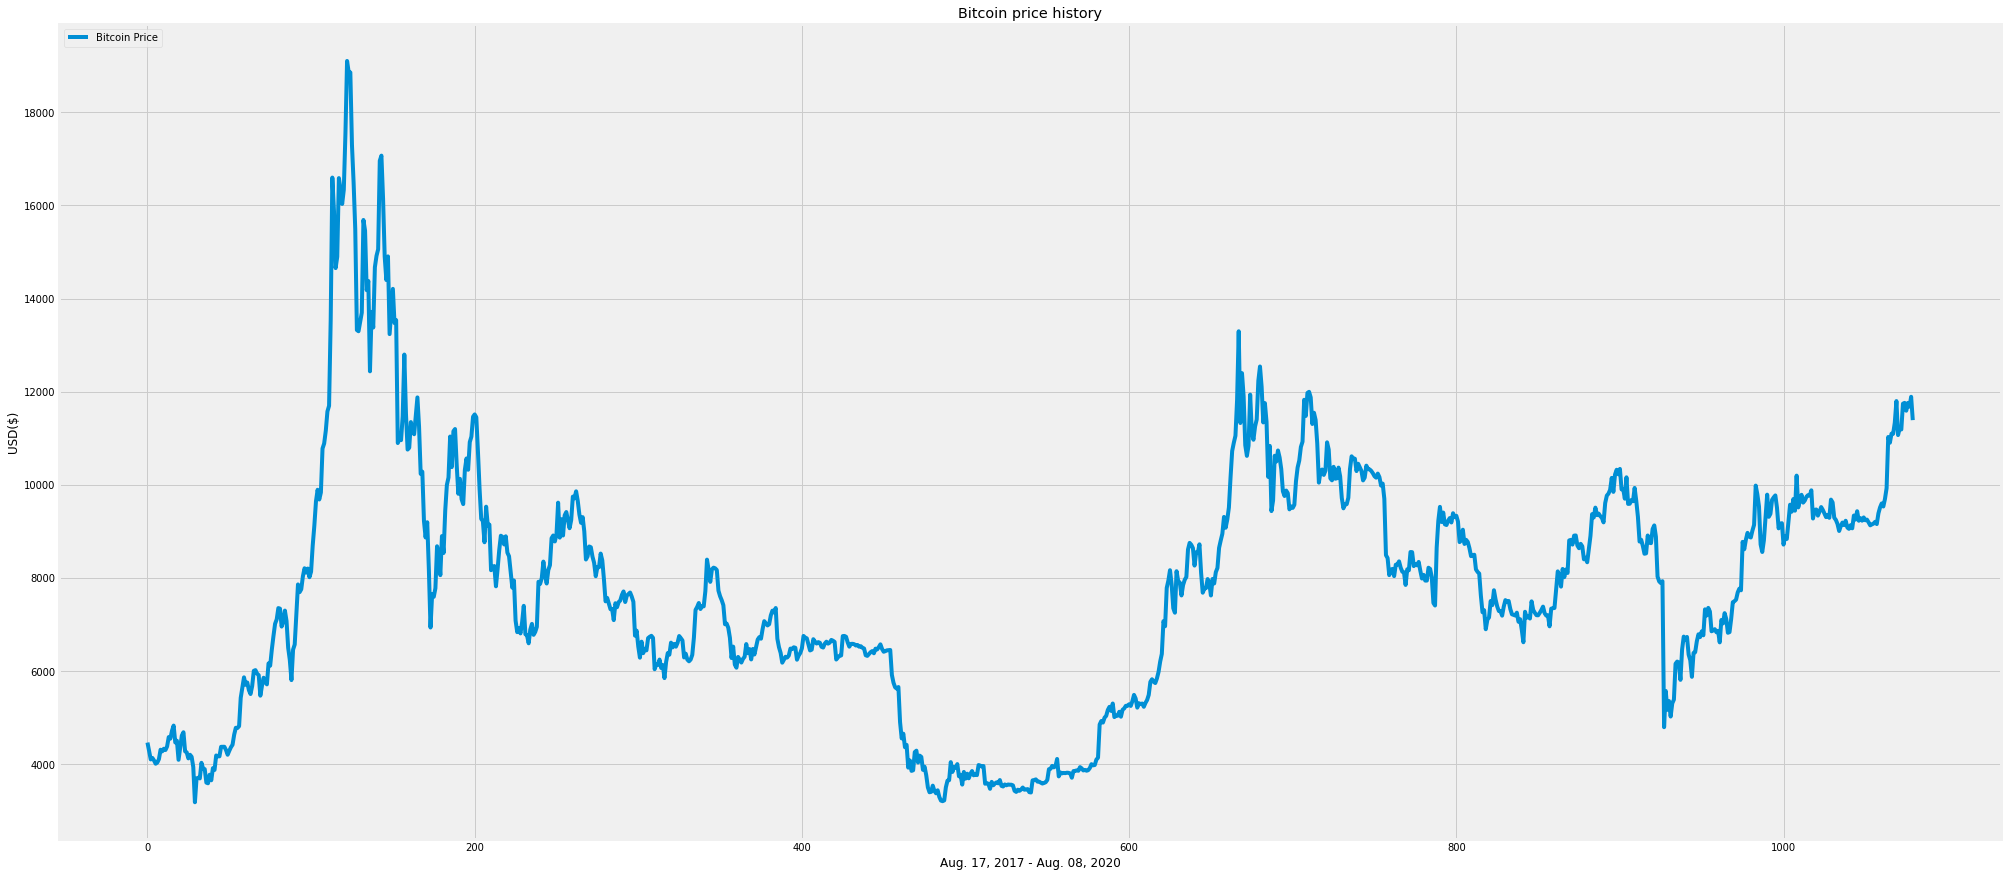

In [ ]:
def graph():
  # Visualize the data
  plt.figure(figsize=(31, 15))
  plt.plot(BitcoinPrice['Open'],label = 'Bitcoin Price')
  plt.title('Bitcoin price history')
  plt.xlabel('Aug. 17, 2017 - Aug. 08, 2020')
  plt.ylabel('USD($)')
  plt.legend(loc='upper left')
  return(plt.show())
graph()

In [ ]:
# Create a new data frame with a simple moving 10-300 day average to store all the data
def create_sma():
  sma = create_dic(30)
  data = pd.DataFrame()
  data['Bitcoin Price'] = BitcoinPrice['Open']
  for key in sma:
    data[key] = BitcoinPrice['Open'].rolling(window=sma[key]).mean()
  return(data)
  
def create_dic(n):
  SMA ={}
  for i in range(1,n+1):
    sma = 'SMA'
    sma += str(i*10)
    SMA.update( {sma : i*10} )
  return(SMA)

create_sma()

,Bitcoin Price,SMA10,SMA20,SMA30,SMA40,SMA50,SMA60,SMA70,SMA80,SMA90,SMA100,SMA110,SMA120,SMA130,SMA140,SMA150,SMA160,SMA170,SMA180,SMA190,SMA200,SMA210,SMA220,SMA230,SMA240,SMA250,SMA260,SMA270,SMA280,SMA290,SMA300
0,4469.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4285.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4108.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4139.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4086.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,11594.23,11392.150,10595.4345,10137.354333,9901.77650,9783.6410,9736.725333,9733.429714,9661.727625,9622.464778,9576.9752,9390.929000,9187.236750,9014.244385,8823.952286,8615.367867,8613.713750,8652.069882,8728.409611,8773.245105,8776.1529,8767.003000,8714.859318,8652.827522,8587.724083,8538.09060,8491.815038,8487.516148,8509.738321,8521.243621,8507.803700
1076,11761.41,11458.238,10723.0555,10221.653667,9965.99775,9832.6646,9769.875000,9762.911000,9689.852375,9656.227444,9608.3893,9435.788818,9228.090833,9055.405692,8863.769643,8640.880467,8633.898313,8664.805118,8739.018389,8785.921526,8791.2798,8784.819190,8735.589136,8671.349130,8606.737958,8555.95912,8509.096500,8498.403074,8518.566500,8536.053241,8519.425033
1077,11681.68,11516.445,10849.1005,10301.431667,10029.57600,9879.1192,9799.819667,9794.816857,9722.515250,9690.895889,9636.9365,9479.791636,9268.131250,9094.165385,8905.666000,8686.758333,8651.188563,8676.597059,8747.121722,8798.011368,8806.2764,8801.470143,8757.025364,8690.325609,8625.167958,8573.51500,8525.904615,8509.160704,8527.448536,8550.774862,8530.536633
1078,11892.92,11572.191,10974.2465,10390.061333,10096.09900,9931.0838,9843.361667,9818.990429,9756.551750,9725.141778,9666.1452,9523.135091,9309.707333,9133.387154,8944.420357,8728.853800,8670.768875,8689.785647,8755.824278,8811.492474,8823.7184,8819.482429,8777.697909,8710.487130,8645.288250,8592.30940,8545.095538,8521.183815,8536.375571,8561.940034,8542.982067


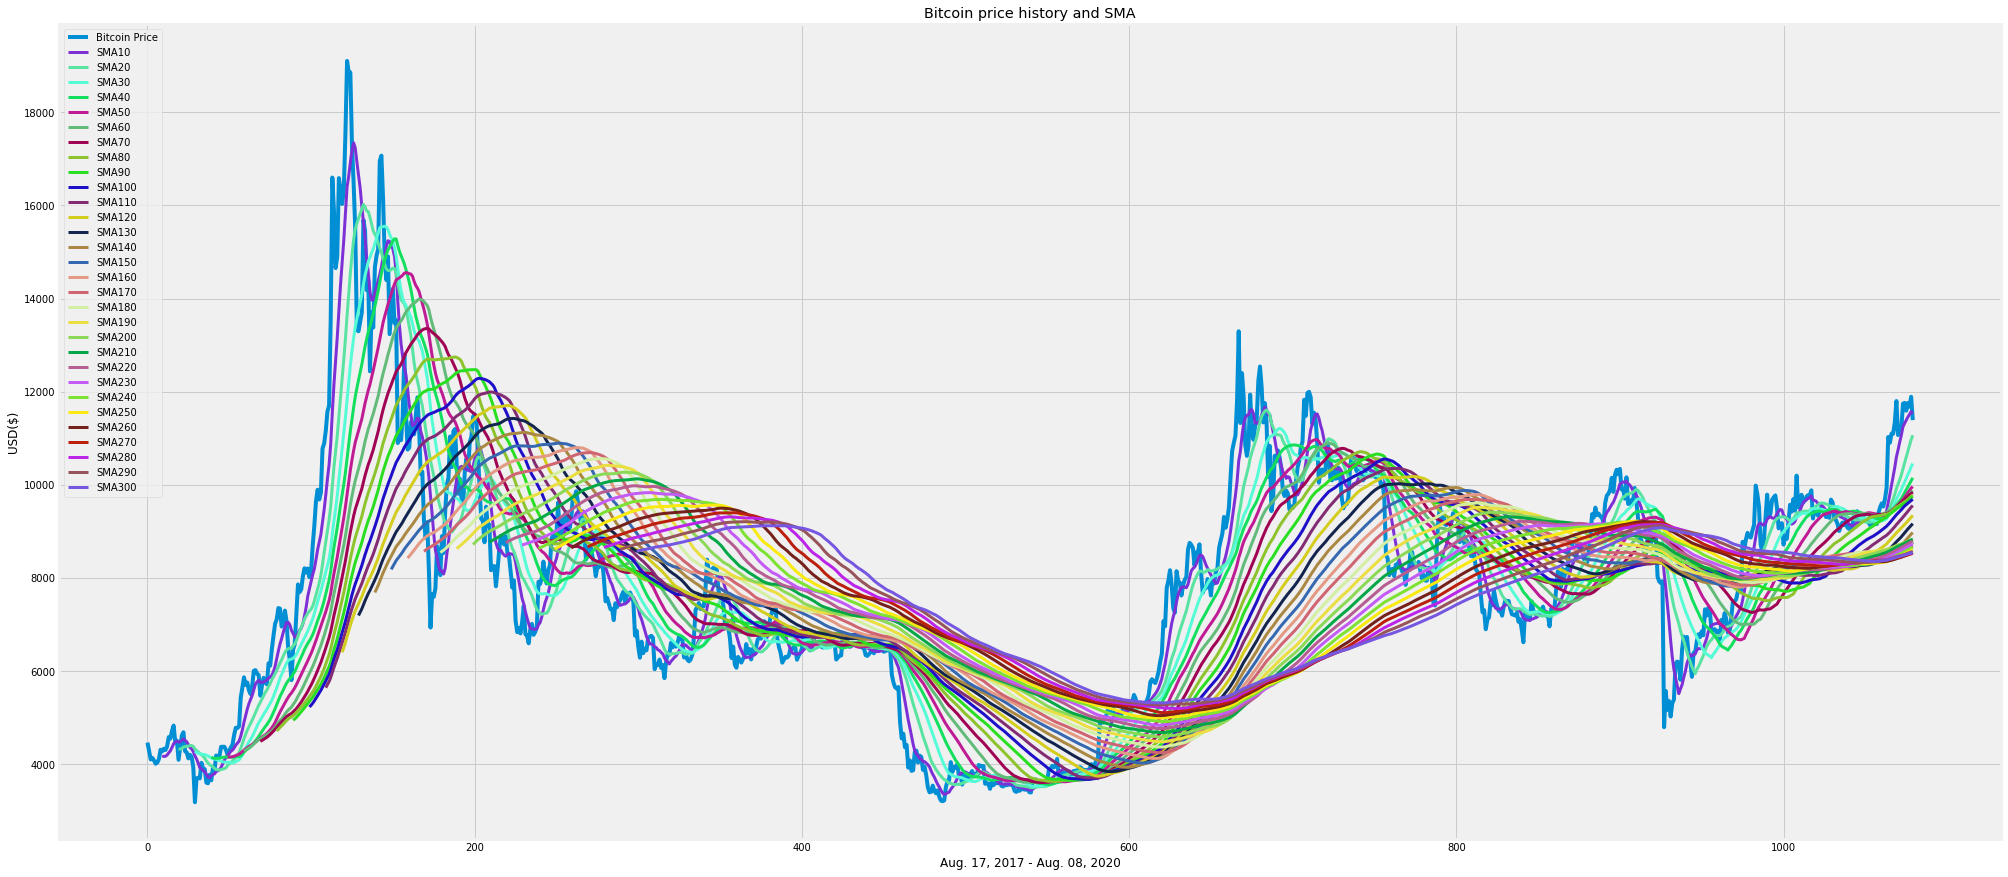

In [ ]:
def graph_sma(): 
  # Visualize the data
  data = create_sma()
  plt.figure(figsize=(31,15))
  plt.plot(data['Bitcoin Price'],label = 'Bitcoin Price')
  sma = create_dic(30)
  number_of_plots = 30
  for key in sma:
    rgb = np.random.rand(3,)
    plt.plot(data[key], label = key, c=rgb, linewidth=3)
  plt.title('Bitcoin price history and SMA')
  plt.xlabel('Aug. 17, 2017 - Aug. 08, 2020')
  plt.ylabel('USD($)')
  plt.legend(loc='upper left')
  return(plt.show())
graph_sma()

In [ ]:
def signals(sma1,sma2):
  data = create_sma()
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    # if data[sma1].head(1) > data[sma2].head(1) and data[sma1].tail(1) < data[sma2].tail(1):
    if data[sma1][i] > data[sma2][i]:
      if flag != 1:
        sigPriceBuy.append(data['Bitcoin Price'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data[sma1][i] < data[sma2][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['Bitcoin Price'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return data, sigPriceBuy, sigPriceSell


In [ ]:
def add_Buy_Sell(data,sma1,sma2):
  data, data['Buy_signal_price'], data['Sell_signal_price']= signals(sma1,sma2)
  # Droping Nan in two frames
  df = pd.DataFrame(data['Buy_signal_price']) 
  dfBuy = df.dropna()
  df2 = pd.DataFrame(data['Sell_signal_price']) 
  dfSell= df2.dropna()
  b =[]
  s = []
  for row in dfBuy.index: 
    b.append(row) 
  for row in dfSell.index: 
    s.append(row) 
  bh = b[0]
  sh = s[0]
   
  bt = b[len(b)-1]
  st = s[len(s)-1]
  # We drop the first sell operation and last buy operation
  if sh < bh:
    dfSell = dfSell.drop(sh)
  if st < bt:
    dfBuy = dfBuy.drop(bt)
  data['Buy_signal_price'], data['Sell_signal_price'] = dfBuy, dfSell
   # Concatenate the frames
  Buy_Sell = pd.concat([dfBuy,dfSell])
  # Sorting data
  dataBS = Buy_Sell.sort_index() 

  return data, dfBuy, dfSell, dataBS

In [ ]:
def algoprofit(sma1,sma2): 
  # Store the buy and sell data into a variable
  # data, data['Buy_signal_price'], data['Sell_signal_price']= signals(sma1,sma2)
  data, df, df2, dBS = add_Buy_Sell(create_sma(),sma1, sma2) 
  buy = df['Buy_signal_price'].sum()
  sell = df2['Sell_signal_price'].sum()
  result = sell - buy
  return(result)  

In [ ]:
def profit(sma1,sma2):
  data, df, df2, dBS = add_Buy_Sell(create_sma(),sma1, sma2) 
  a = df['Buy_signal_price'].values[0]
  b = df2['Sell_signal_price'].values[len(df2['Sell_signal_price']) - 1]
  result = b - a 
  return result

In [ ]:
# Create a function to signal wen to buy and sell the asset
def graph_smas(sma1,sma2):
   #  Visualize the signals
  print('\n____________________________________________________________________________________________________________________________________________\n\n\t\t\t\tWith the paar: ', sma1, ' and ', sma2, ' we have next buy-sell signals in the graph below: \n\t')
  data, df, df2, dBS = add_Buy_Sell(create_sma(),sma1, sma2) 
  plt.figure(figsize=(32, 15))
  plt.plot(data['Bitcoin Price'], label = 'Bitcoin Price', alpha = 0.35)
  plt.plot(data[sma1], label = sma1, alpha = 0.35)
  plt.plot(data[sma2], label = sma2, alpha = 0.35)
  plt.scatter(data.index, data['Buy_signal_price'], label = 'Buy', marker = '^', color = 'green')
  plt.scatter(data.index, data['Sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
  plt.title('Bitcoin_Buy_Sell_Signals')
  plt.xlabel('Aug. 17, 2017 - Aug. 12, 2020')
  plt.ylabel('USD($)')
  plt.legend(loc='upper left')
  plt.show()
  print('\n\tHERE THE BUY-SELL TABLE :\n\n\t',dBS)
  text = 'THE PROFIT WITH'
  print('\n\n\t', text, sma1, ' AND ', sma2,' IS :', algoprofit(sma1,sma2))
  print('\n\tWithout this algorythm the profit would be only :', profit(sma1,sma2))




				NEXT 5 SMAs CROSSING PRICE WILL GIVE US MAXIMUM PROFIT 


	In the graphs below we will illustate these signals :


____________________________________________________________________________________________________________________________________________

				With the paar:  SMA10  and  SMA30  we have next buy-sell signals in the graph below: 
	


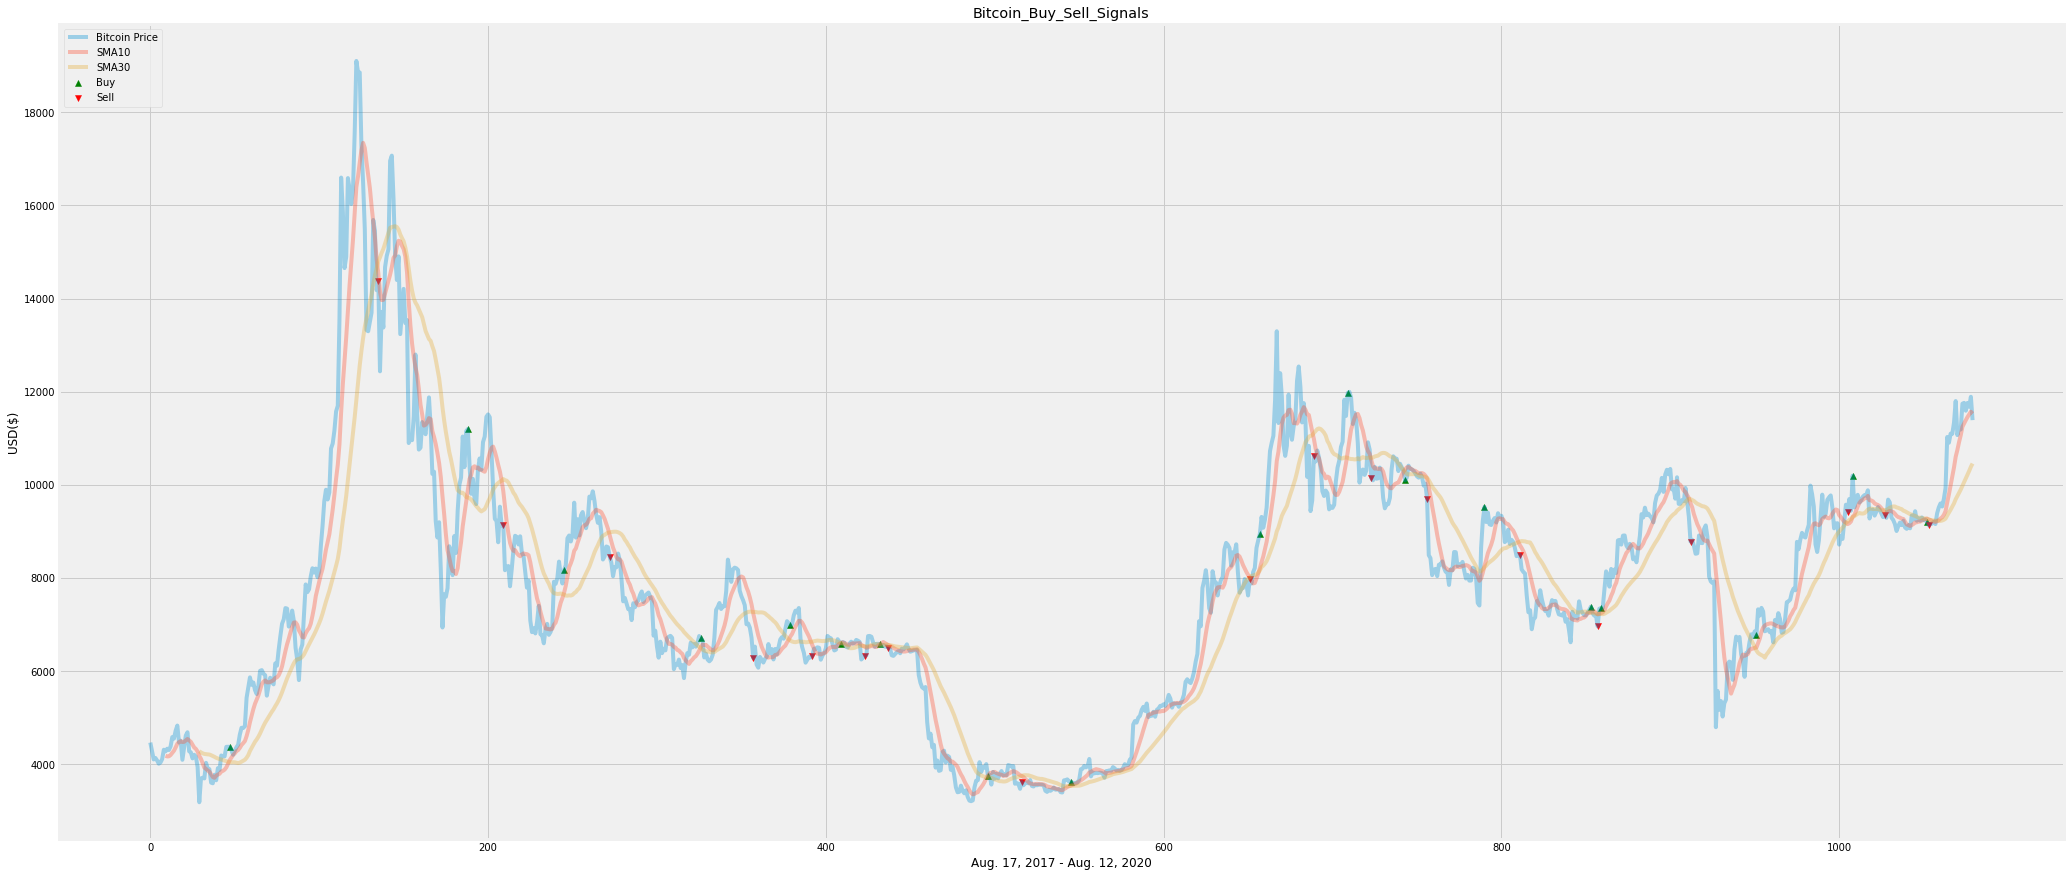


	HERE THE BUY-SELL TABLE :

	       Buy_signal_price  Sell_signal_price
47             4380.00                NaN
135                NaN           14378.90
188           11200.99                NaN
209                NaN            9150.00
245            8173.00                NaN
272                NaN            8462.00
326            6712.10                NaN
357                NaN            6285.00
379            6984.84                NaN
392                NaN            6338.62
409            6596.38                NaN
423                NaN            6332.93
432            6581.20                NaN
437                NaN            6505.60
496            3745.79                NaN
516                NaN            3626.09
545            3631.46                NaN
651                NaN            7982.75
657            8953.33                NaN
689                NaN           10627.16
709           11975.03                NaN
723                NaN           10142.57
743

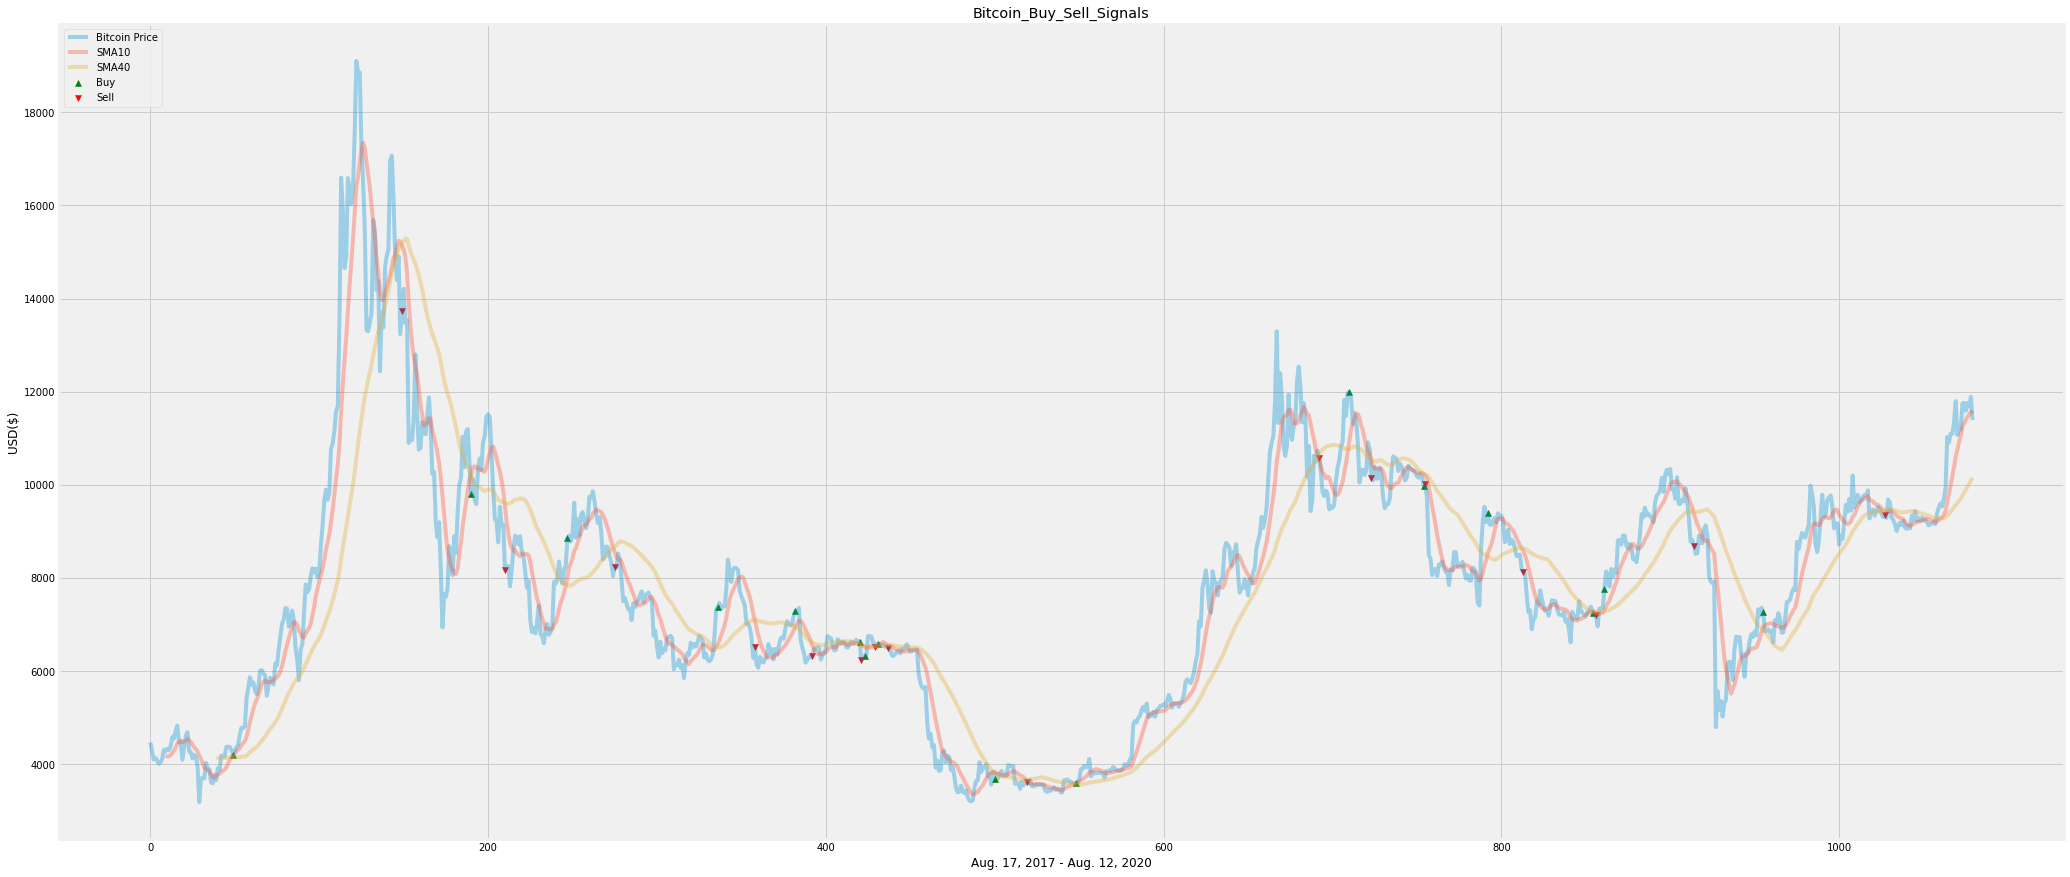


	HERE THE BUY-SELL TABLE :

	       Buy_signal_price  Sell_signal_price
49             4208.59                NaN
149                NaN           13740.01
190            9811.04                NaN
210                NaN            8170.00
247            8856.98                NaN
275                NaN            8239.81
336            7381.90                NaN
358                NaN            6529.79
382            7302.01                NaN
392                NaN            6338.62
420            6631.00                NaN
421                NaN            6252.68
423            6332.93                NaN
429                NaN            6528.88
431            6590.11                NaN
437                NaN            6505.60
500            3695.32                NaN
519                NaN            3616.21
548            3602.47                NaN
692                NaN           10589.45
710           11999.77                NaN
723                NaN           10142.57
754

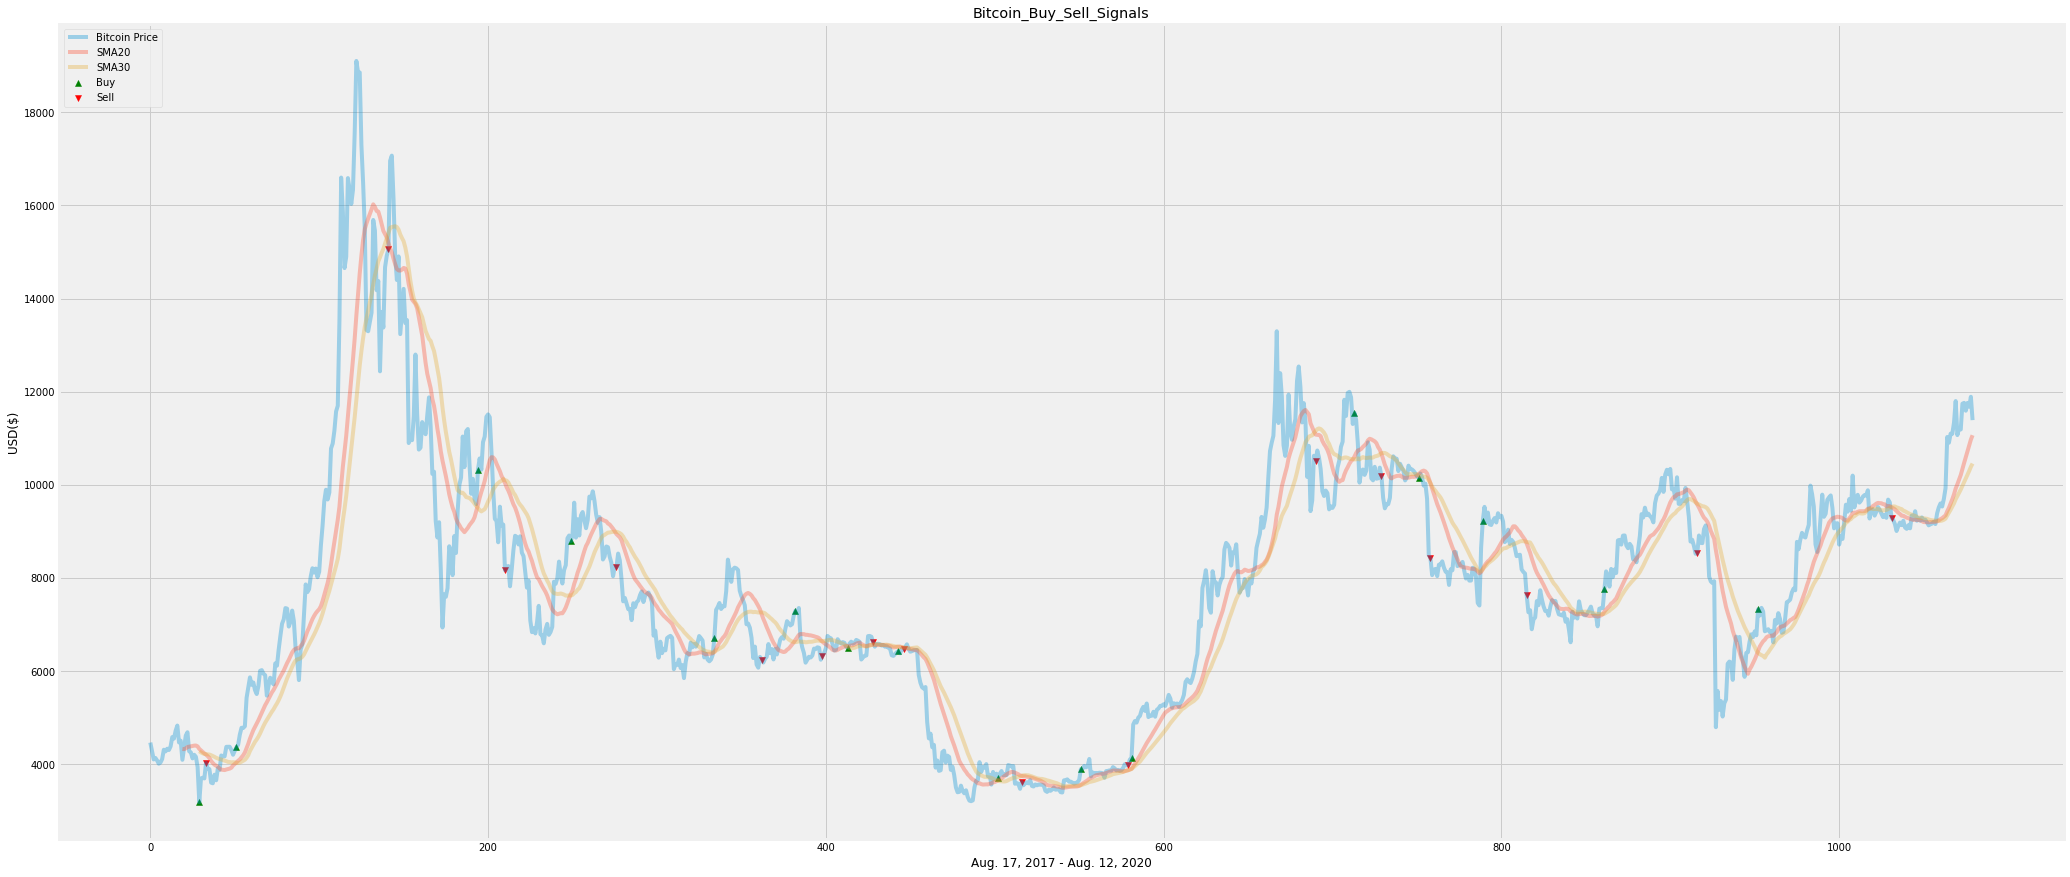


	HERE THE BUY-SELL TABLE :

	       Buy_signal_price  Sell_signal_price
29             3189.02                NaN
33                 NaN            4035.01
51             4369.00                NaN
141                NaN           15059.54
194           10324.00                NaN
210                NaN            8170.00
249            8787.02                NaN
276                NaN            8233.49
334            6723.35                NaN
362                NaN            6246.35
382            7302.01                NaN
398                NaN            6336.45
413            6510.00                NaN
428                NaN            6618.96
443            6433.98                NaN
446                NaN            6468.99
502            3702.90                NaN
516                NaN            3626.09
551            3898.60                NaN
579                NaN            3987.81
581            4144.56                NaN
690                NaN           10504.29
713

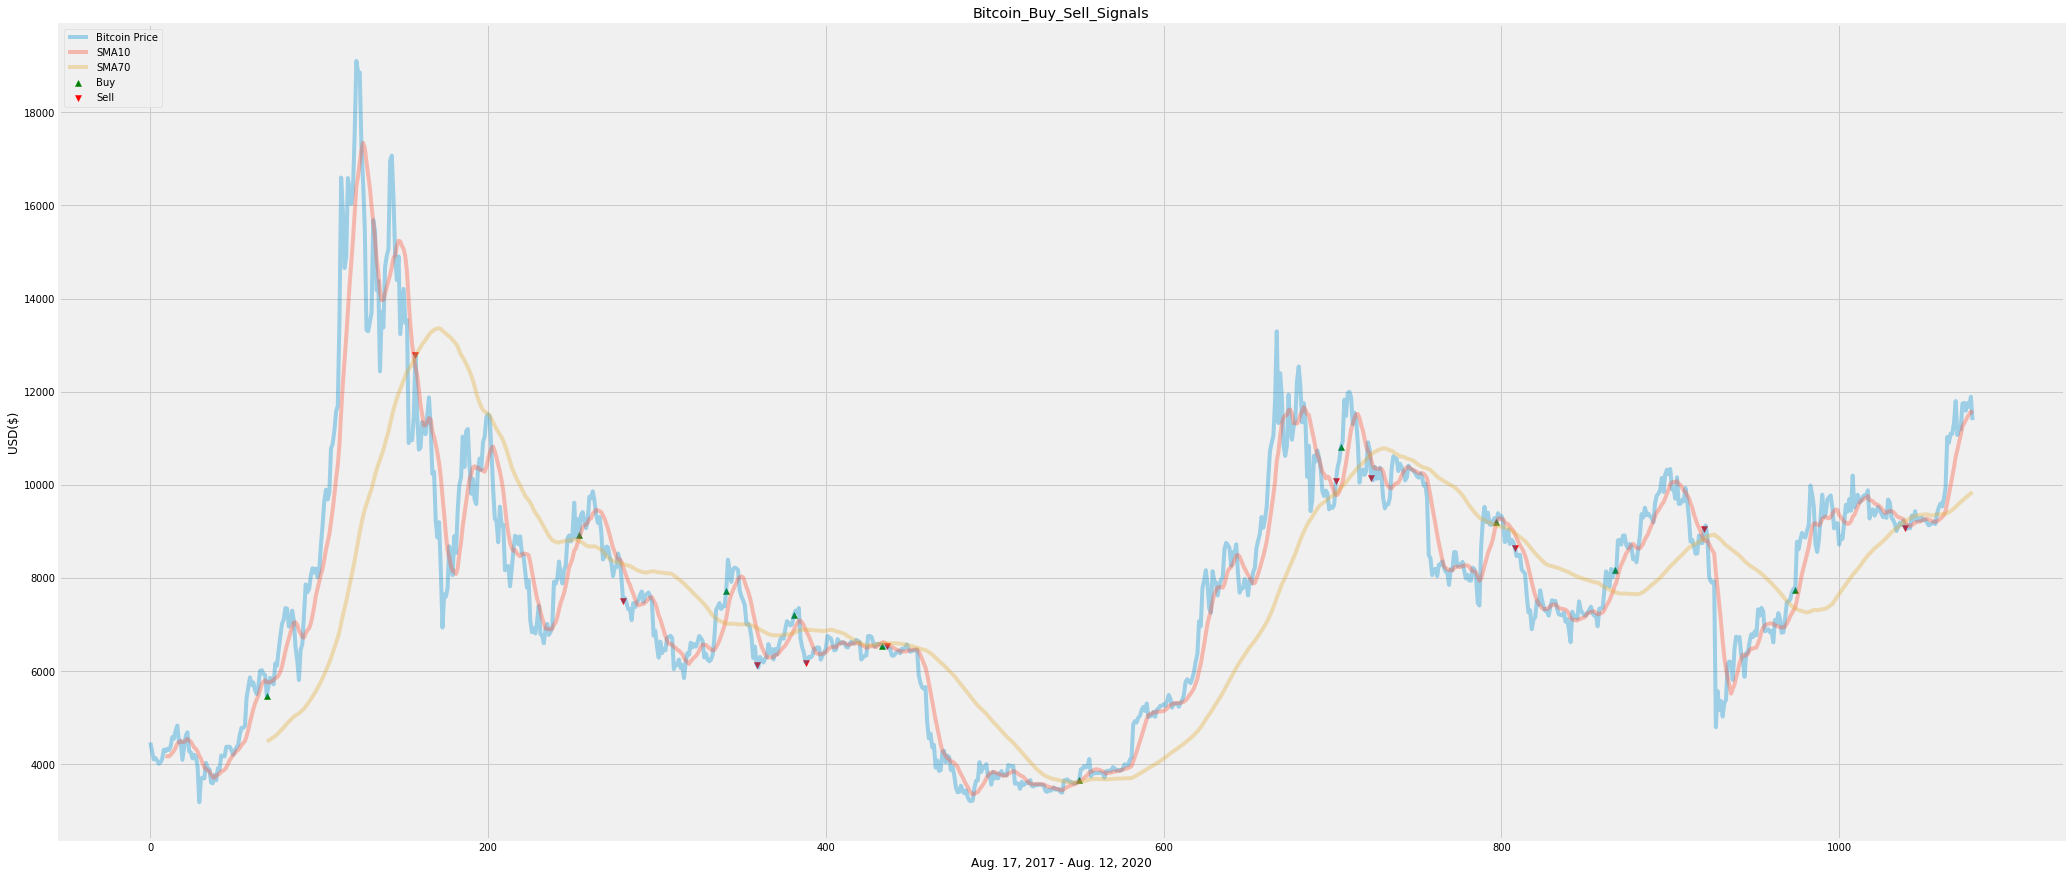


	HERE THE BUY-SELL TABLE :

	       Buy_signal_price  Sell_signal_price
69             5477.03                NaN
157                NaN           12799.94
254            8915.35                NaN
280                NaN            7501.95
341            7721.01                NaN
359                NaN            6144.01
381            7200.01                NaN
388                NaN            6185.05
433            6553.51                NaN
436                NaN            6538.63
550            3667.58                NaN
702                NaN           10080.53
705           10816.86                NaN
723                NaN           10142.57
797            9194.71                NaN
808                NaN            8646.68
867            8184.98                NaN
920                NaN            9054.68
974            7738.98                NaN
1039               NaN            9086.54


	 THE PROFIT WITH SMA10  AND  SMA70  IS : 10710.560000000027

	Without this algorythm

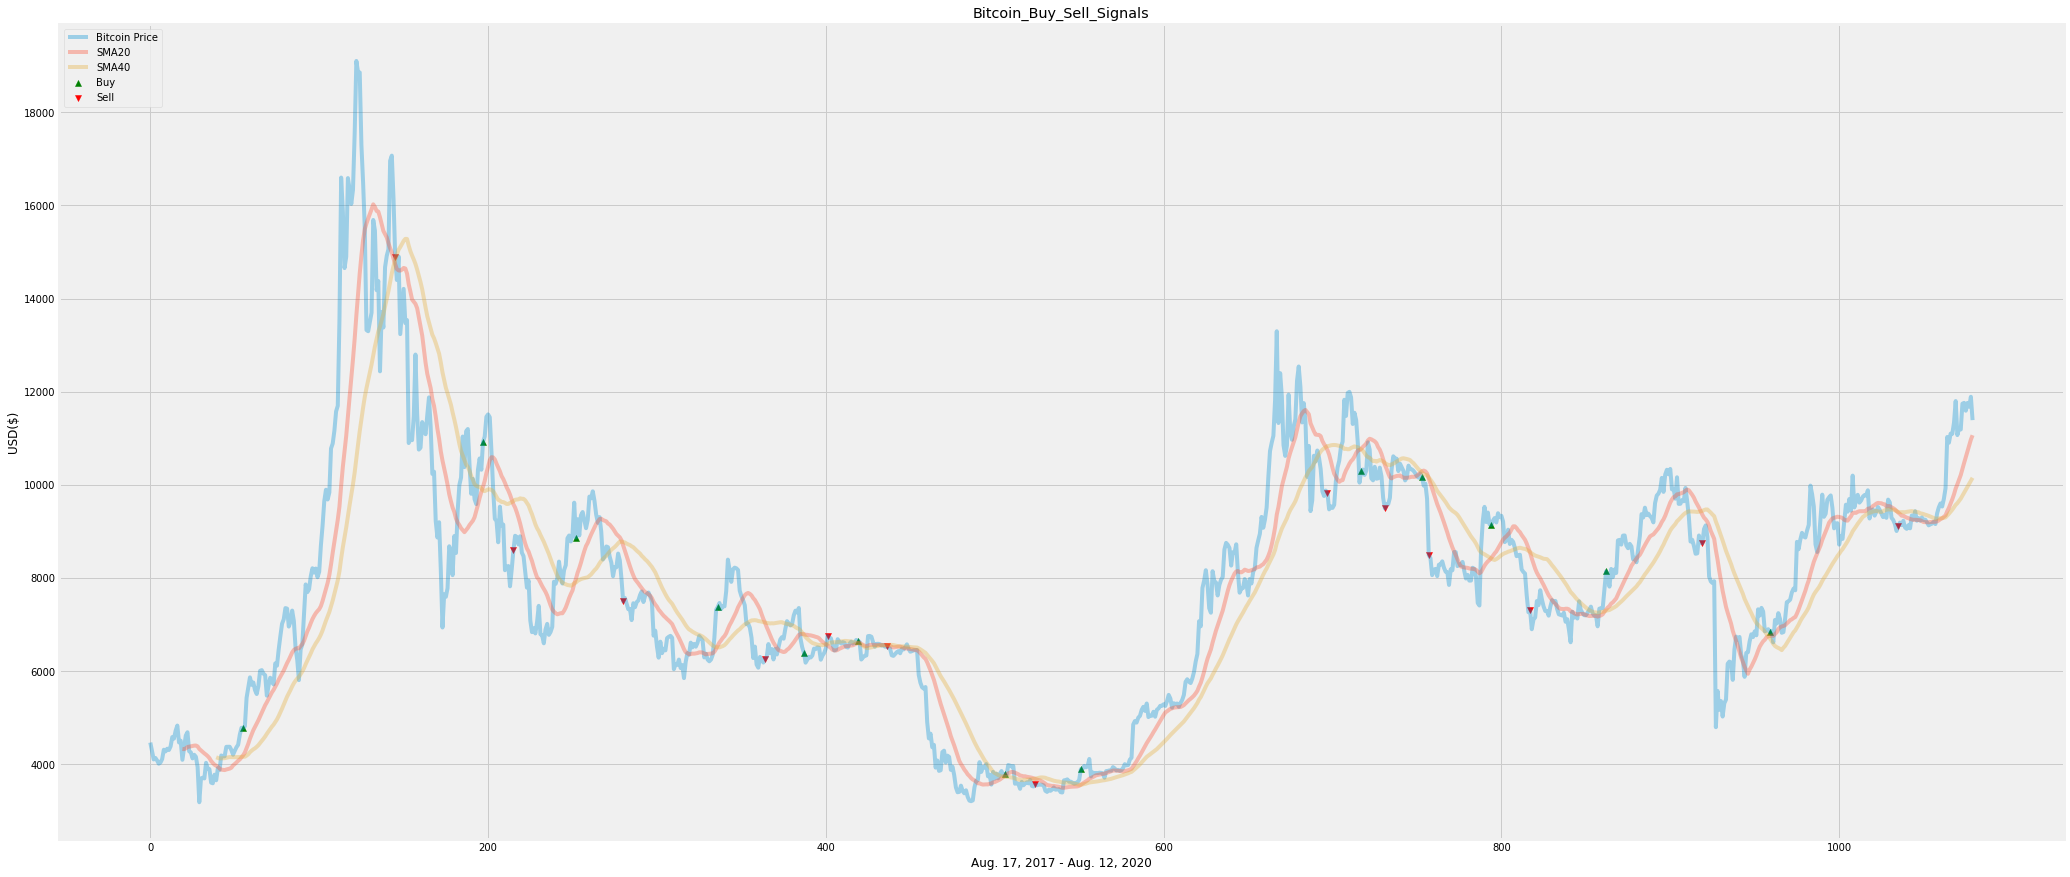


	HERE THE BUY-SELL TABLE :

	       Buy_signal_price  Sell_signal_price
55             4783.06                NaN
145                NaN           14902.54
197           10920.00                NaN
215                NaN            8600.00
252            8869.99                NaN
280                NaN            7501.95
336            7381.90                NaN
364                NaN            6267.16
387            6395.54                NaN
401                NaN            6759.02
419            6656.61                NaN
436                NaN            6538.63
506            3792.01                NaN
524                NaN            3570.93
551            3898.60                NaN
697                NaN            9824.00
717           10293.93                NaN
731                NaN            9498.44
753           10168.59                NaN
757                NaN            8493.14
794            9140.85                NaN
817                NaN            7311.57
862

In [ ]:
def main():
  data = create_dic(30)
  sig = []
  prof_sma = {}
  for key in data:
    sig.append(key)
  for i in range(len(sig)):
    for j in range(len(sig)):  
      if j > i and algoprofit(sig[i],sig[j]) > 0:
        sign = sig[i]+sig[j]
        val= algoprofit(sig[i],sig[j])
        prof_sma.update({sign: val})
  sorted_d = dict(sorted(prof_sma.items(), key=op.itemgetter(1),reverse=True))
  print('\n\t\t\t\tNEXT 5 SMAs CROSSING PRICE WILL GIVE US MAXIMUM PROFIT \n')
  print('\n\tIn the graphs below we will illustate these signals :\n')

  for a in list(sorted_d)[0:5]:
    sig1 = ''
    sig2 = ''
    if len(a)<=10:
      for k in list(a)[0:5]:
        sig1+=k
      for k in list(a)[5:10]:
        sig2+=k
    elif len(a) == 11:
      for k in list(a)[0:5]:
        sig1+=k
      for k in list(a)[5:11]:
        sig2+=k
    else:
      for k in list(a)[0:6]:
        sig1+=k
      for k in list(a)[6:12]:
        sig2+=k
    if a == 0:
      print('THE MAXIMUM PROFIT WITH PRICE CROSSING OF ', sig1, 'AND' , sig2, ' :', str(sorted_d[a]).upper())
    graph_smas(sig1,sig2)

main()